In [2]:
# read in json file
import json
found_abstracts = json.load(open('lncRNA_output.json')) # the all_lncRNA output resulted from using all lncRNAs in our multiclass gene list (the lncRNA_output just contains lncRNAs that overlap with lnc2cancerv2 and CRlncRNA)


In [8]:
len(found_abstracts)

6044

In [3]:
found_abstracts

[{'Article Title': 'Serum total thiol levels and the risk of lung, colorectal, breast and prostate cancer: A prospective case-cohort study.',
  'Journal Title': 'International journal of cancer',
  'PMID': '31125113',
  'Year': '2019',
  'Relations': [{'Genes': ['ttl'],
    'Stems': ['associat'],
    'Sentence': 'However, the associations of serum total thiol levels (TTL) with the incidences of the four most frequent cancer sites have not yet been investigated in a large population-based, prospective study.'},
   {'Genes': ['ttl'],
    'Stems': ['breast', 'prostate', 'depend'],
    'Sentence': 'Hazard ratios (HRs) and 95% confidence intervals (95% CIs) were estimated by weighted multivariable-adjusted Cox regression with time-dependent modeling of TTL for incident lung, colorectal, breast and prostate cancer.'},
   {'Genes': ['ttl'],
    'Stems': ['associat'],
    'Sentence': 'High serum TTL were associated with a reduced risk of all four major cancers.'},
   {'Genes': ['ttl'],
    'St

In [5]:
import pandas as pd
import numpy as np
gene_list = pd.read_csv('../multiclass_lncRNAs.txt', header=None)[0]
gene_list = [gene.lower() for gene in gene_list]
gene_list = np.unique(gene_list)
len(gene_list)

595

In [9]:
hallmarks = ['methylat', 'metasta', 'prolifer', 'invasi',
       'apoptosis', 'migrat', 'growth', 'cell cycle arrest', 'cell cycle',
       'EMT', 'immun', 'tumor suppress', 'angiogenesis', 'oncogen',
       'cell cycle progression', 'autophag', 'metaboli', 'prognosis']

stem_to_hallmark = { # some stems are named slightly differently, but still map to a hallmark
    'self-sufficiency in growth signals': 'growth',
    'metastasis': 'metasta',
    'growth arrest': 'cell cycle arrest',
    'migration': 'migrat',
    'onco': 'oncogen',
    'methyl': 'methylat',
    'hypomethyl': 'methylat',
    'hypermethyl': 'methylat',
    'tumour suppressor': 'tumor suppress',
    'tumor suppressor': 'tumor suppress',
    'metabol': 'metaboli'
}


In [10]:
found_abstracts[35]

{'Article Title': 'Prostate cancer patients may have an increased risk of coexisting advanced colorectal neoplasms.',
 'Journal Title': 'OncoTargets and therapy',
 'PMID': '27672332',
 'Year': '2016',
 'Relations': [{'Genes': ['pca1'],
   'Stems': ['colon'],
   'Sentence': 'A total of 191 patients diagnosed with PCa had colonoscopies within 1 year of PCa diagnosis.'}]}

In [11]:
# want to link genes and hallmarks
genes_and_hallmarks = pd.DataFrame(index=gene_list, columns=hallmarks)
genes_and_hallmarks
for abstract in found_abstracts:
    gene_and_hm = []
    for rel in abstract['Relations']:
#         print(rel['Genes'], rel['Stems'])
        for stem in rel['Stems']:
            if stem in hallmarks:
                to_add = [(g, stem) for g in rel['Genes']] # a tuple for each gene
                gene_and_hm.extend(to_add)
            elif stem in stem_to_hallmark.keys():
                to_add = [(g, stem_to_hallmark[stem]) for g in rel['Genes']] # a tuple for each gene
                gene_and_hm.extend(to_add)
            
    genes_and_hm = set(gene_and_hm)# removes uniques
    for g_and_h in genes_and_hm:
        if g_and_h[0] in gene_list: # if the gene is one of our lncRNAs (cols of genes_and_hallmarks)
            if np.isnan(genes_and_hallmarks.loc[g_and_h[0], g_and_h[1]]):
                genes_and_hallmarks.loc[g_and_h[0], g_and_h[1]] = 1
            else:
                genes_and_hallmarks.loc[g_and_h[0], g_and_h[1]] = genes_and_hallmarks.loc[g_and_h[0], g_and_h[1]] + 1
    
# taking out genes that have no hallmarks
genes_and_hallmarks = genes_and_hallmarks.loc[genes_and_hallmarks.sum(axis = 1) != 0, :]

,methylat,metasta,prolifer,invasi,apoptosis,migrat,growth,cell cycle arrest,cell cycle,EMT,immun,tumor suppress,angiogenesis,oncogen,cell cycle progression,autophag,metaboli,prognosis
a1bg-as1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abhd15-as1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac002076.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac002094.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac002464.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
znf436-as1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
znf503-as2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
znf529-as1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
znf674-as1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
genes_and_hallmarks
# so we found hallmarks for 105 genes

,methylat,metasta,prolifer,invasi,apoptosis,migrat,growth,cell cycle arrest,cell cycle,EMT,immun,tumor suppress,angiogenesis,oncogen,cell cycle progression,autophag,metaboli,prognosis
a1bg-as1,NaN,NaN,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac083880.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adamts9-as1,NaN,NaN,3,2,NaN,2,2,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
azin1-as1,1,1,1,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cahm,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vim-as1,NaN,2,2,2,2,3,3,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zeb1-as1,3,21,26,19,12,17,12,NaN,3,8,4,NaN,NaN,25,NaN,1,NaN,NaN
zfas1,NaN,24,34,25,18,24,15,NaN,9,8,5,7,1,37,3,NaN,NaN,NaN
zfhx4-as1,NaN,NaN,1,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/in268/.local/lib/python3.7/site-packages/pandas/core/frame.py:3089: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,methylat,metasta,prolifer,invasi,apoptosis,migrat,growth,cell cycle arrest,cell cycle,EMT,immun,tumor suppress,angiogenesis,oncogen,cell cycle progression,autophag,metaboli,prognosis
a1bg-as1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ac083880.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
adamts9-as1,0,0,3,2,0,2,2,0,0,1,0,0,0,1,0,0,0,0
azin1-as1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
cahm,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vim-as1,0,2,2,2,2,3,3,0,1,2,0,0,0,0,0,0,0,0
zeb1-as1,3,21,26,19,12,17,12,0,3,8,4,0,0,25,0,1,0,0
zfas1,0,24,34,25,18,24,15,0,9,8,5,7,1,37,3,0,0,0
zfhx4-as1,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0


,methylat,metasta,prolifer,invasi,apoptosis,migrat,growth,cell cycle arrest,cell cycle,EMT,immun,tumor suppress,angiogenesis,oncogen,cell cycle progression,autophag,metaboli,prognosis
a1bg-as1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ac083880.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
adamts9-as1,0,0,3,2,0,2,2,0,0,1,0,0,0,1,0,0,0,0
azin1-as1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
cahm,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vim-as1,0,2,2,2,2,3,3,0,1,2,0,0,0,0,0,0,0,0
zeb1-as1,3,21,26,19,12,17,12,0,3,8,4,0,0,25,0,1,0,0
zfas1,0,24,34,25,18,24,15,0,9,8,5,7,1,37,3,0,0,0
zfhx4-as1,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0


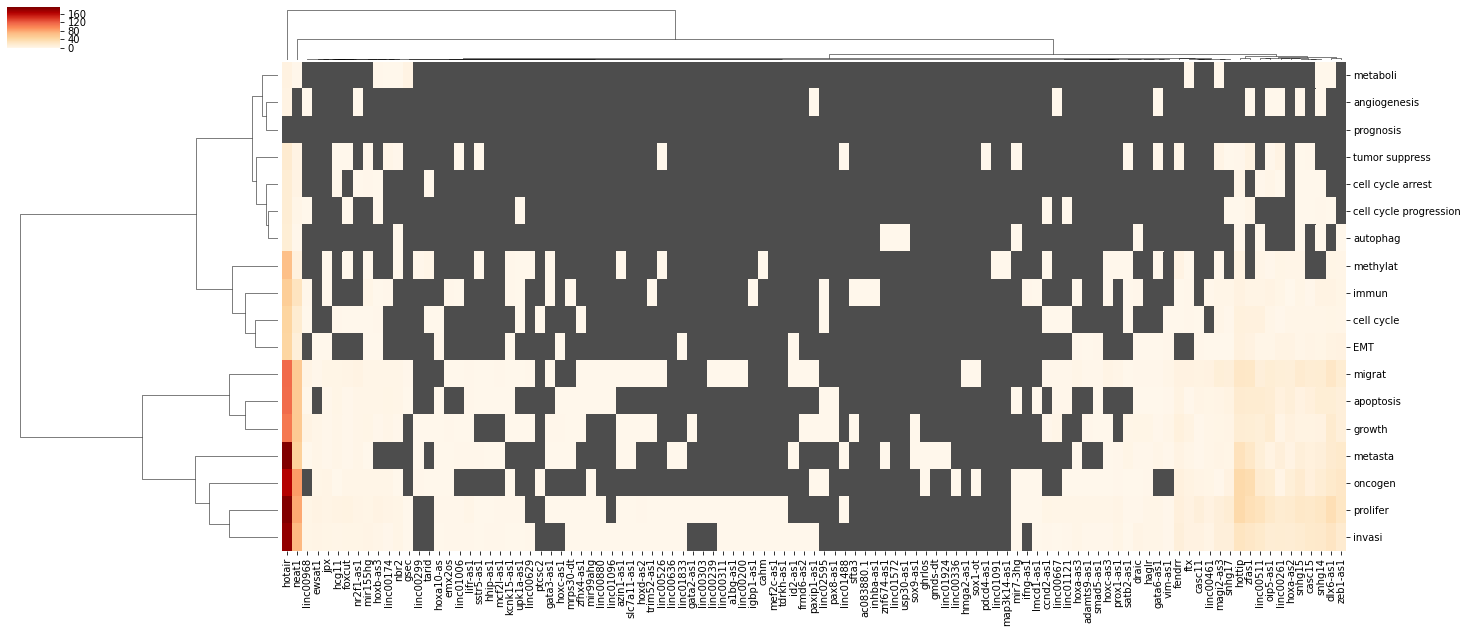

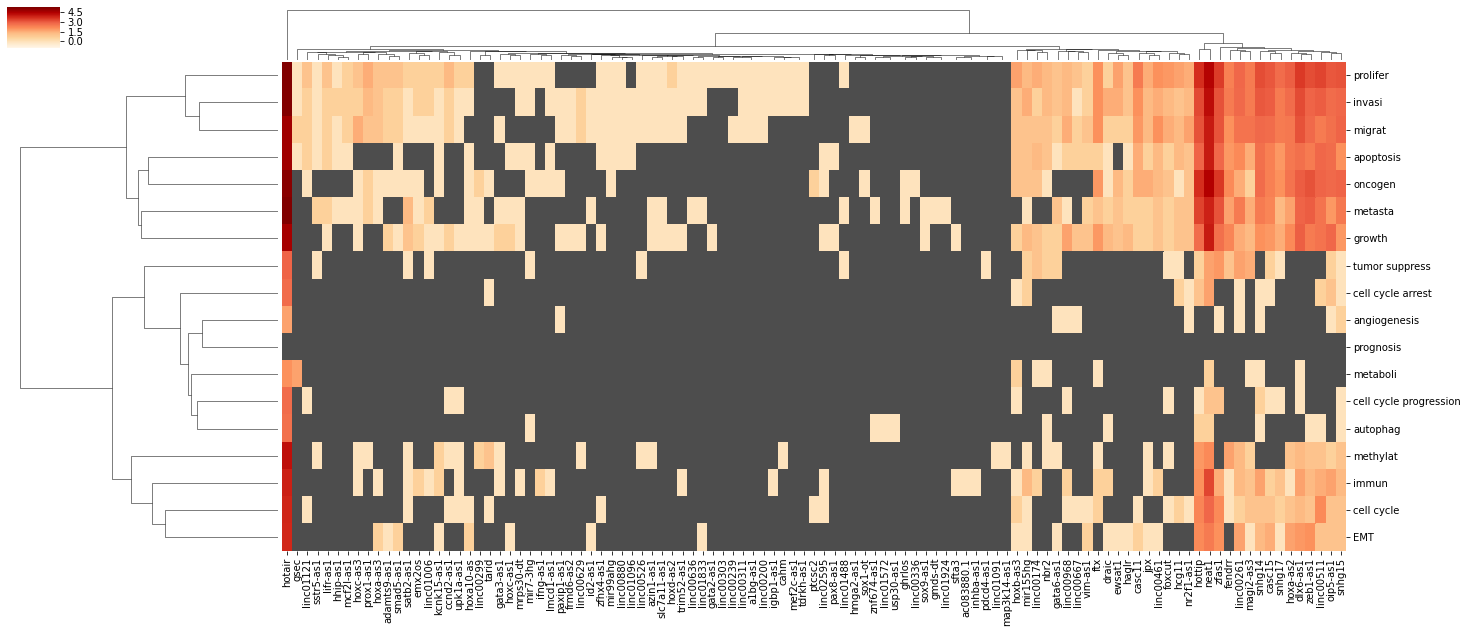

In [14]:
# quick heatmap:
genes_and_hallmarks[genes_and_hallmarks.isnull()] = 0
genes_and_hallmarks

genes_and_hallmarks
import seaborn as sb


cols = [(0.3,0.3,0.3)] + sb.color_palette('OrRd', int(genes_and_hallmarks.max().max()))
cmap = {k:v for k, v in zip(range(int(genes_and_hallmarks.max().max())), cols)}

cg = sb.clustermap(genes_and_hallmarks.transpose().astype(float), cmap = cols, figsize = (24, 10))

# and the logged version:
cols = [(0.3,0.3,0.3)] + sb.color_palette('OrRd', int(genes_and_hallmarks.max().max()))
cmap = {k:v for k, v in zip([-1] + list(range(int(genes_and_hallmarks.max().max()))), cols)}

logged = genes_and_hallmarks.mask(genes_and_hallmarks <=0).astype(float).apply(np.log).fillna(-1)
cg = sb.clustermap(logged.transpose().astype(float), cmap = cols, figsize = (24, 10))

In [15]:
# now save this to a csv so we can combine it with the database lncRNA findings
genes_and_hallmarks.to_csv('pangea_genes_and_hallmark_relations.csv')